<a href="https://colab.research.google.com/github/saiprakash321/smart-grama-panchyath/blob/main/FordGoBike_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Communicate Data Findings

This project is divided into two major parts.

- In the first part, you will conduct an **exploratory data analysis** on a dataset of your choosing.
- In the second part, you will take your main findings from your exploration and convey them to others through an **explanatory analysis**.


I will perform an exploratory analysis on data provided by **Ford GoBike**,
a bike-share system provider.

     Dataset :https://www.fordgobike.com/system-data
              https://s3.amazonaws.com/baywheels-data/index.html
              i.e.  201904-fordgobike-tripdata.csv.zip
              
              Dataset Contain: 239111 Rows & 14 Columns
                i.e     duration_sec               
                        start_time                
                        end_time                   
                        start_station_id           
                        start_station_name         
                        start_station_latitude     
                        start_station_longitude    
                        end_station_id             
                        end_station_name           
                        end_station_latitude       
                        end_station_longitude      
                        bike_id                    
                        user_type                 
                        bike_share_for_all_trip

In [1]:
#import important packagesabs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Exploratory data Analysis

**Table of Contents:**

    1) Introduction
    2) Data Wrangling for Exploration
    3) Univariate Exploration
    4) Bivariate Explorationn
    5) Multivariate Exploration
    6) Summary

### Data Wrangling for Exploration

In [11]:
import pandas as pd
import zipfile

# Open the ZIP file
with zipfile.ZipFile('/content/201801-fordgobike-tripdata.csv.zip', 'r') as zip_ref:
    # Get a list of files in the ZIP archive
    file_list = zip_ref.namelist()
    # Find the CSV file (assuming it ends with '.csv')
    csv_file = [f for f in file_list if f.endswith('.csv')][0]
    # Extract the CSV file to a temporary file
    with zip_ref.open(csv_file) as file, open('temp.csv', 'wb') as temp_file:
        temp_file.write(file.read())

# Read the CSV data from the temporary file
df = pd.read_csv('temp.csv')

#### Analyze

In [13]:
#import important packagesabs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import zipfile

# Open the ZIP file
with zipfile.ZipFile('/content/201801-fordgobike-tripdata.csv.zip', 'r') as zip_ref:
    # Get a list of files in the ZIP archive
    file_list = zip_ref.namelist()
    # Find the CSV file (assuming it ends with '.csv')
    csv_file = [f for f in file_list if f.endswith('.csv')][0]
    # Extract the CSV file to a temporary file
    with zip_ref.open(csv_file) as file, open('temp.csv', 'wb') as temp_file:
        temp_file.write(file.read())

# Read the CSV data from the temporary file
ford_df = pd.read_csv('temp.csv') # Assign the dataframe to ford_df

ford_df.head() # Now ford_df is defined and can be used

duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:58:31.0530   

   start_station_id                                 start_station_name  \
0               120                               Mission Dolores Park   
1                15  San Francisco Ferry Building (Harry Bridges Pl...   
2               304                               Jackson St at 5th St   
3                75                           Market St at Franklin St   
4                74                              Laguna St at Hayes St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.761420              -122.426435             285   
1               37.795392              -122.394203              15   
2               37.348759              -121.894798             296   
3               37.773793              -122.421239              47   
4               37.776435              -122.426244              19   

                                    end_station_name  end_station_latitude  \
0                         Webster St at O'Farrell St             37.783521   
1  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
2                              5th St at Virginia St             37.325998   
3                              4th St at Harrison St             37.780955   
4                               Post St at Kearny St             37.788975   

   end_station_longitude  bike_id   user_type bike_share_for_all_trip  
0            -122.431158     2765  Subscriber                      No  
1            -122.394203     2815    Customer                      No  
2            -121.877120     3039    Customer                      No  
3            -122.399749      321    Customer                      No  
4            -122.403452      617  Subscriber                      No

In [14]:
#summary
ford_df.info()
ford_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  bike_share_for_all_trip  94802 non-null  object 
dtypes: float64(4), int64(4

(94802, 14)

In [15]:
ford_df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  94802.000000      94802.000000            94802.000000   
mean     870.935930        103.766302               37.773321   
std     2550.596891         87.730464                0.085744   
min       61.000000          3.000000               37.317298   
25%      359.000000         30.000000               37.771662   
50%      555.000000         79.000000               37.781270   
75%      854.000000        160.000000               37.795392   
max    85546.000000        342.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count             94802.000000     94802.00000          94802.000000   
mean               -122.361677       101.00982             37.773536   
std                   0.105253        86.77949              0.085552   
min                -122.444293         3.00000             37.317298   
25%                -122.412408        27.00000             37.773063   
50%                -122.398773        76.00000             37.781752   
75%                -122.390428       157.00000             37.795392   
max                -121.874119       342.00000             37.880222   

       end_station_longitude       bike_id  
count           94802.000000  94802.000000  
mean             -122.360776   2048.751609  
std                 0.104580   1091.507513  
min              -122.444293     11.000000  
25%              -122.411306   1133.000000  
50%              -122.398436   2151.500000  
75%              -122.390428   3015.000000  
max              -121.874119   3744.000000

In [16]:
#check duplicte values
ford_df.duplicated().sum()

np.int64(0)

In [17]:
#check null values
ford_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [18]:

ford_df['user_type'].value_counts()

user_type
Subscriber    82458
Customer      12344
Name: count, dtype: int64

#### cleaning

In [19]:
ford_clean=ford_df.copy()
ford_clean.head(5)

duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:58:31.0530   

   start_station_id                                 start_station_name  \
0               120                               Mission Dolores Park   
1                15  San Francisco Ferry Building (Harry Bridges Pl...   
2               304                               Jackson St at 5th St   
3                75                           Market St at Franklin St   
4                74                              Laguna St at Hayes St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.761420              -122.426435             285   
1               37.795392              -122.394203              15   
2               37.348759              -121.894798             296   
3               37.773793              -122.421239              47   
4               37.776435              -122.426244              19   

                                    end_station_name  end_station_latitude  \
0                         Webster St at O'Farrell St             37.783521   
1  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
2                              5th St at Virginia St             37.325998   
3                              4th St at Harrison St             37.780955   
4                               Post St at Kearny St             37.788975   

   end_station_longitude  bike_id   user_type bike_share_for_all_trip  
0            -122.431158     2765  Subscriber                      No  
1            -122.394203     2815    Customer                      No  
2            -121.877120     3039    Customer                      No  
3            -122.399749      321    Customer                      No  
4            -122.403452      617  Subscriber                      No

In [ ]:
# convert dates to timestamps
ford_clean.start_time = pd.to_datetime(ford_clean['start_time'])
ford_clean.end_time = pd.to_datetime(ford_clean['end_time'])

In [ ]:
#change start_station_id, end_station_id, bike_id to string
ford_clean.bike_id = (ford_clean['bike_id']).astype(str)
ford_clean.start_station_id = (ford_clean['start_station_id']).astype(str)
ford_clean.end_station_id = (ford_clean['end_station_id']).astype(str)

In [ ]:
ford_clean.user_type= (ford_clean['user_type']) .astype('category')

In [20]:
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  bike_share_for_all_trip  94802 non-null  object 
dtypes: float64(4), int64(4

In [ ]:
#extract weekday name from start_time
ford_clean['start_time_day']=ford_clean['start_time'].dt.strftime('%a')

In [ ]:
#extract weekday name from start_time
ford_clean['start_time_hour']=ford_clean['start_time'].dt.hour

In [ ]:
ford_clean['duration_min']=ford_clean['duration_sec']/60

In [21]:
ford_clean.head(2)

duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   

   start_station_id                                 start_station_name  \
0               120                               Mission Dolores Park   
1                15  San Francisco Ferry Building (Harry Bridges Pl...   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.761420              -122.426435             285   
1               37.795392              -122.394203              15   

                                    end_station_name  end_station_latitude  \
0                         Webster St at O'Farrell St             37.783521   
1  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   

   end_station_longitude  bike_id   user_type bike_share_for_all_trip  
0            -122.431158     2765  Subscriber                      No  
1            -122.394203     2815    Customer                      No

In [ ]:
ford_clean['start_time_day'].value_counts()

Tue    43607
Mon    40913
Wed    38852
Thu    38850
Fri    35462
Sat    23070
Sun    18357
Name: start_time_day, dtype: int64

### Exploration (Visualization)

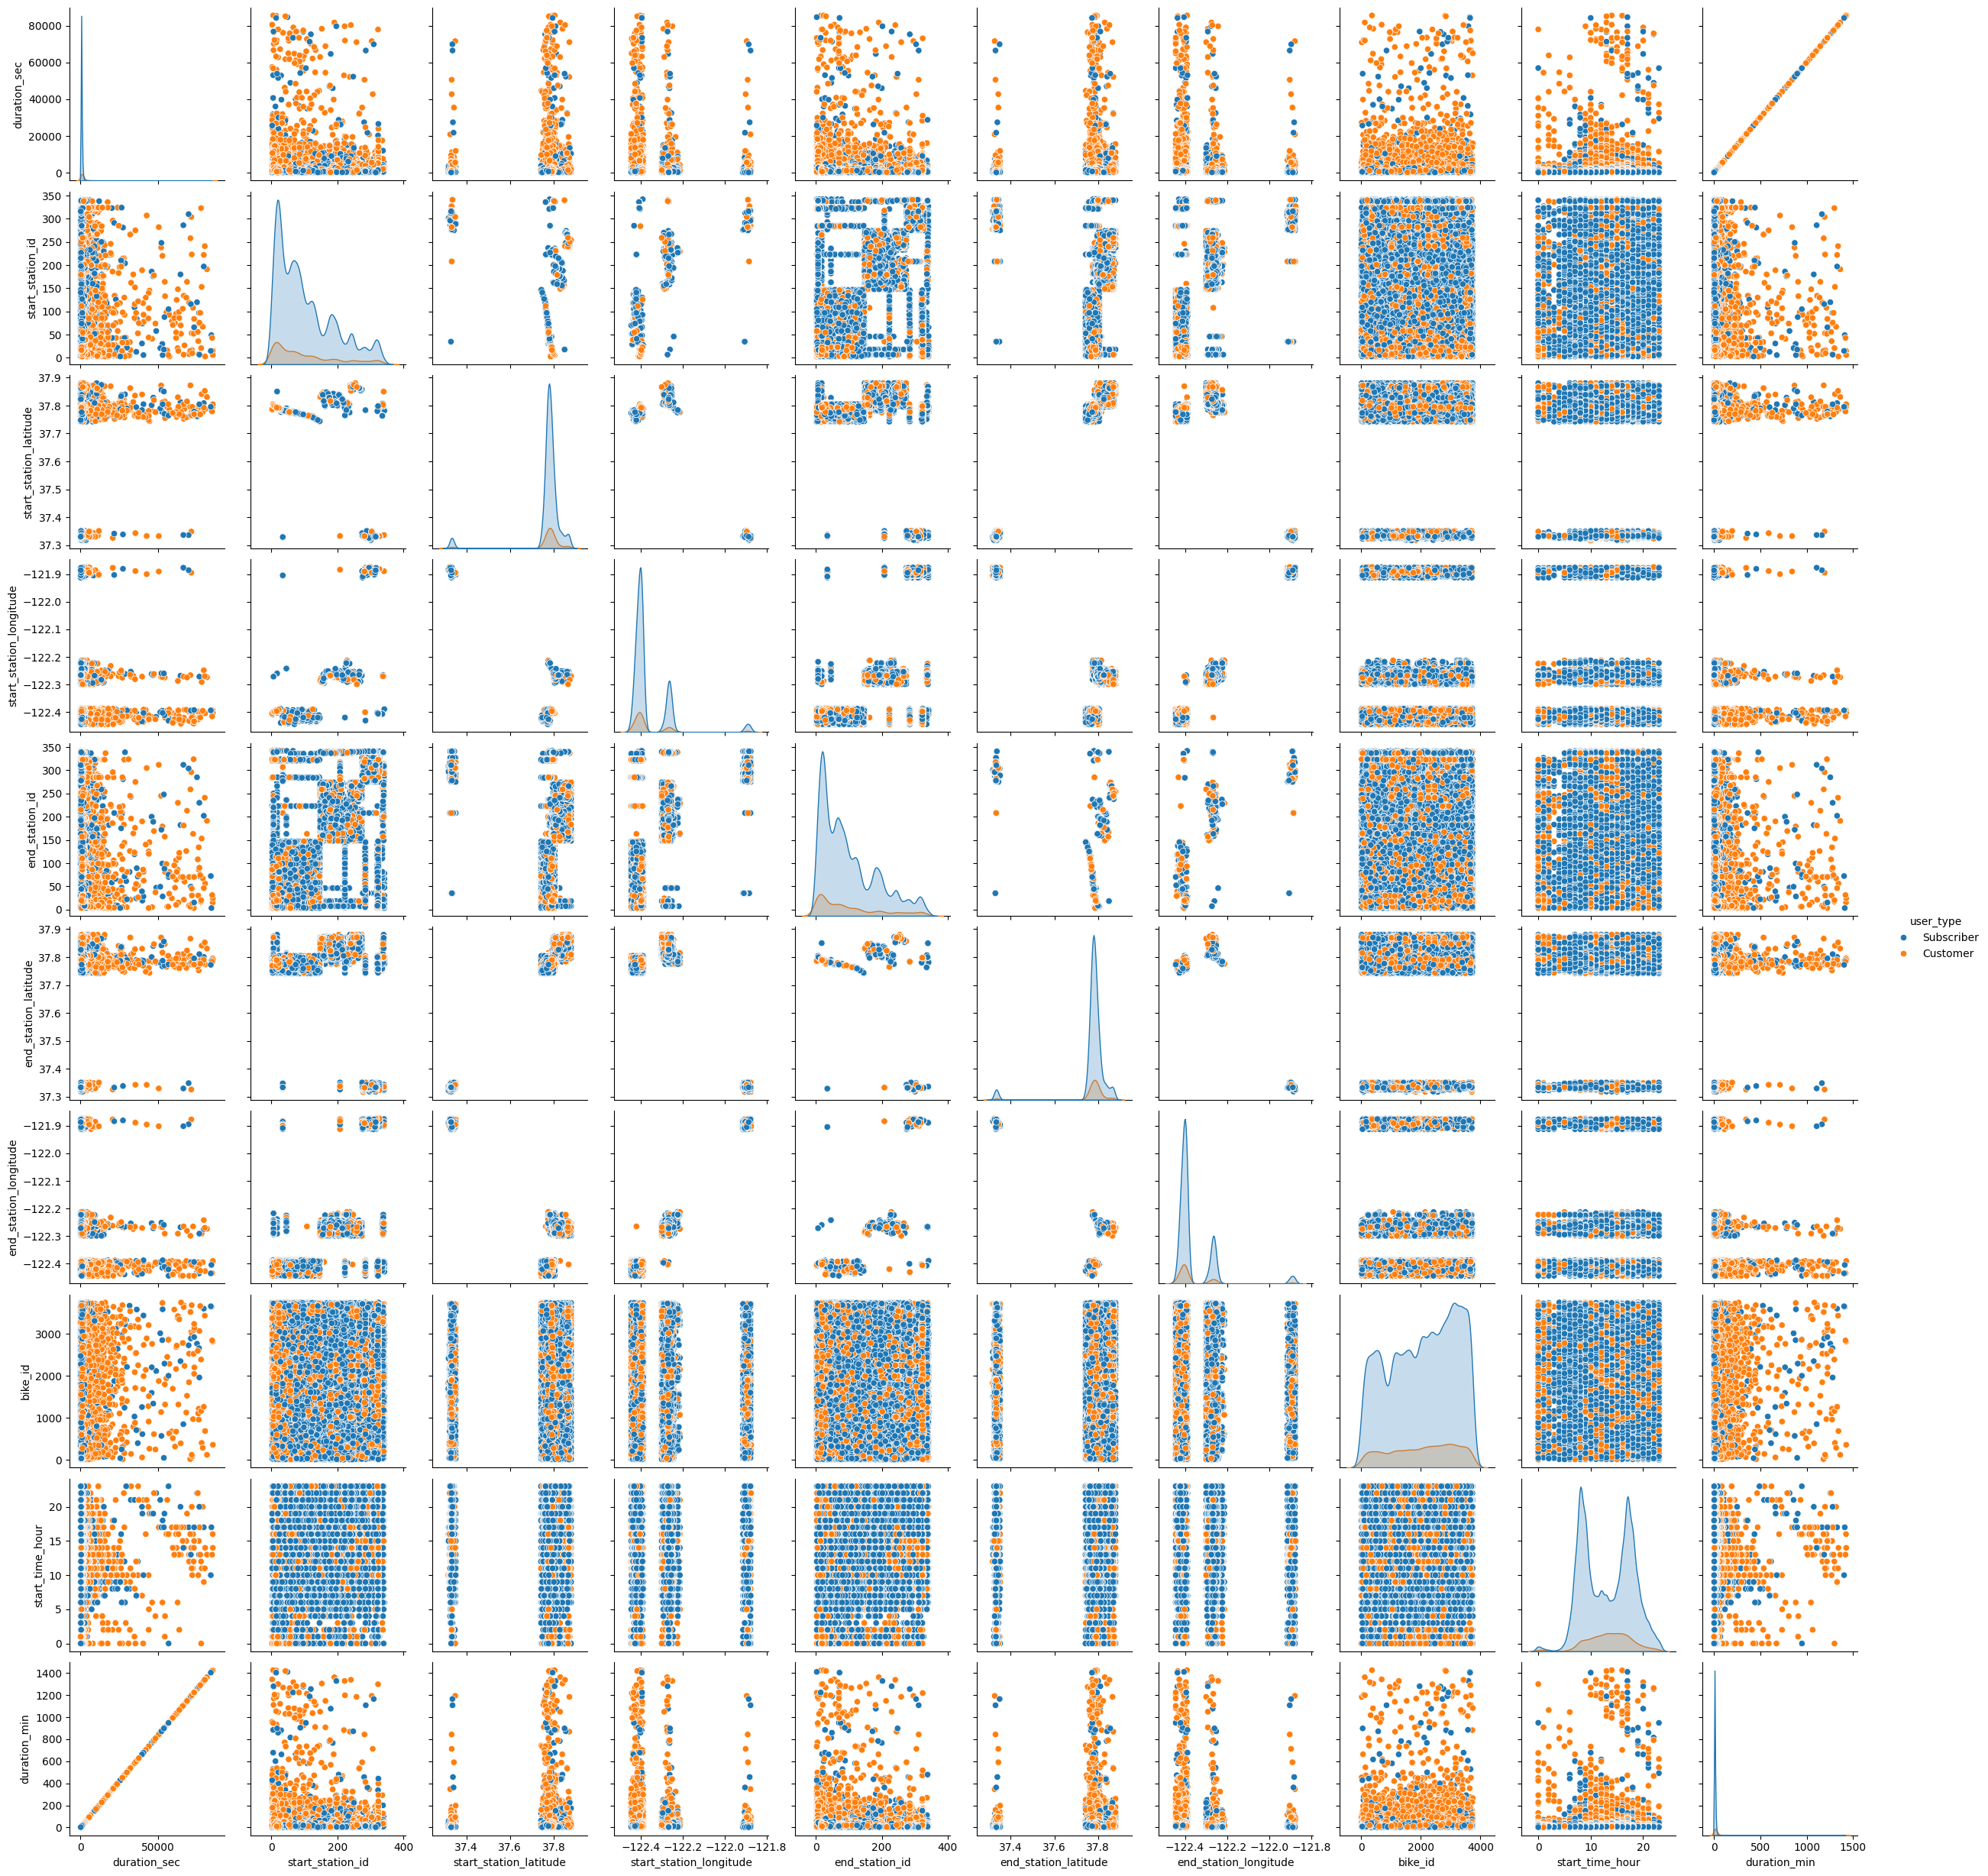

In [43]:
sns.pairplot(ford_clean, hue='user_type', height=2.5)

### Univariate Exploration
    1) Bikes rides on weekdays
    2) Hourly rides of the bike
    3) Trip duration (sec) histogram
    4) Distribution of User Type

In [ ]:
base_color= sns.color_palette()[0]

Text(30.958950617283932, 0.5, 'No. of Bike Trips')

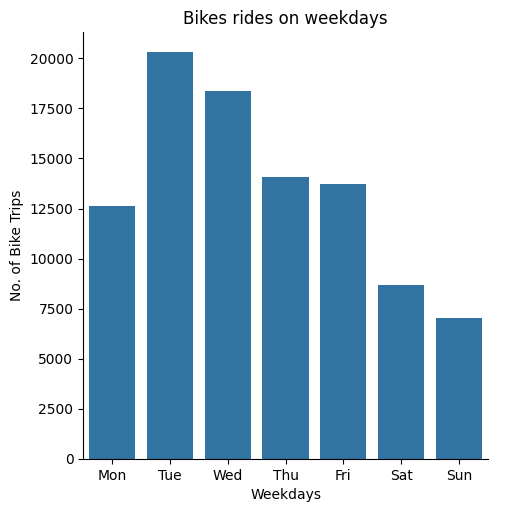

In [28]:
#import important packagesabs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Define base_color here so it's accessible in this code block
base_color = sns.color_palette()[0]

#1) Bikes rides on weekdays
weekday=['Mon',"Tue","Wed","Thu","Fri","Sat","Sun"]

# Ensure 'start_time_day' column exists and is accessible in ford_clean
# If it's created in a different cell, re-run that cell to bring it into current scope
# Example: if you created 'start_time_day' using:
# ford_clean['start_time_day'] = ford_clean['start_time'].dt.strftime('%a')
# then ensure that line is executed before this cell.


# Convert 'start_time' and 'end_time' to datetime
ford_clean['start_time'] = pd.to_datetime(ford_clean['start_time'])
ford_clean['end_time'] = pd.to_datetime(ford_clean['end_time'])

# Now you can extract weekday name from start_time
ford_clean['start_time_day'] = ford_clean['start_time'].dt.strftime('%a')


sns.catplot(data=ford_clean, x='start_time_day', kind='count', order=weekday, color=base_color)
plt.title("Bikes rides on weekdays")

plt.xlabel("Weekdays")
plt.ylabel("No. of Bike Trips")

Text(-8.825000000000003, 0.5, 'No. of Bike Trips')

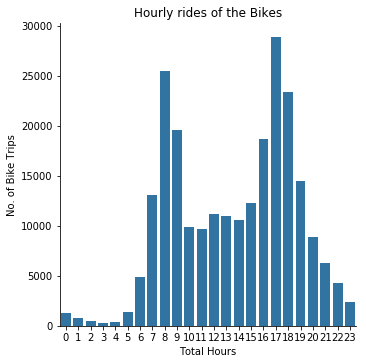

In [ ]:
# 2) Hourly rides of the bike
sns.catplot(data=ford_clean, x='start_time_hour', kind='count',  color=base_color)
plt.title("Hourly rides of the Bikes")

plt.xlabel("Total Hours")
plt.ylabel("No. of Bike Trips")

Text(0.5, 0, 'Duration in Sec')

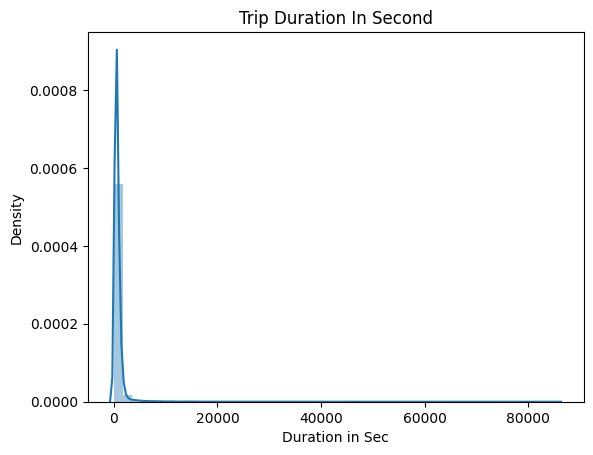

In [29]:
#3) Trip duration (sec)
sns.distplot(ford_clean['duration_sec'])
plt.title("Trip Duration In Second")

plt.xlabel("Duration in Sec")

<Figure size 500x500 with 0 Axes>

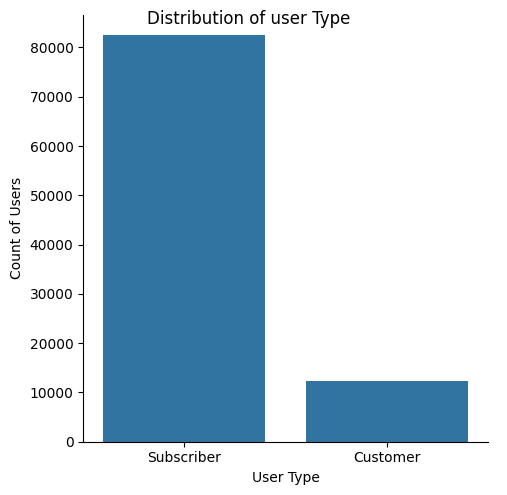

In [30]:
# 4) Distribution of user type
plt.figure(figsize=(5,5))
a=sns.catplot(data=ford_clean, x='user_type', kind='count',  color=base_color)
a.fig.suptitle("Distribution of user Type")

a.set_axis_labels("User Type", "Count of Users")

### Bivariate Exploration
    1) Weekly usage Trends by user type
    2) Hourly usage of the bike share system user type
    3) Bike Rides percentage by user type(Pie chart) : Source:https://pythonspot.com/matplotlib-pie-chart/
    4) Trip Duration and Start Station
    5) Trip Duration and End Station



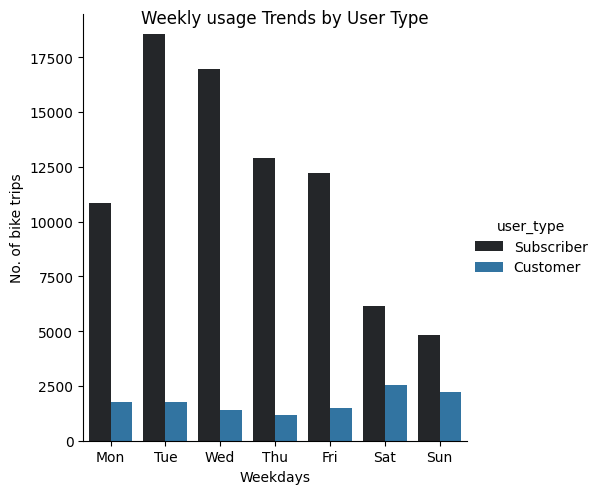

In [31]:
#1) #weekly usage Trends by user type
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
a=sns.catplot(data=ford_clean, x='start_time_day', hue='user_type',order=weekday, kind='count', sharey= False,color=base_color)
a.fig.suptitle('Weekly usage Trends by User Type', )

a.set_axis_labels('Weekdays',"No. of bike trips")

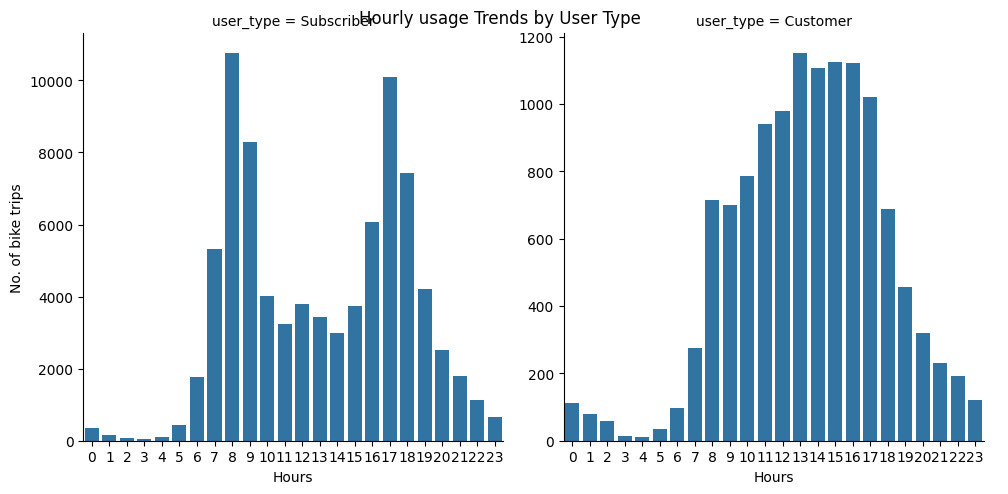

In [34]:
#import important packagesabs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import zipfile

# Open the ZIP file
with zipfile.ZipFile('/content/201801-fordgobike-tripdata.csv.zip', 'r') as zip_ref:
    # Get a list of files in the ZIP archive
    file_list = zip_ref.namelist()
    # Find the CSV file (assuming it ends with '.csv')
    csv_file = [f for f in file_list if f.endswith('.csv')][0]
    # Extract the CSV file to a temporary file
    with zip_ref.open(csv_file) as file, open('temp.csv', 'wb') as temp_file:
        temp_file.write(file.read())

# Read the CSV data from the temporary file
ford_df = pd.read_csv('temp.csv') # Assign the dataframe to ford_df

# ... (Rest of your data loading and cleaning code) ...

# Convert 'start_time' to datetime
ford_clean['start_time'] = pd.to_datetime(ford_clean['start_time'])

# Extract 'start_time_hour'
ford_clean['start_time_hour'] = ford_clean['start_time'].dt.hour # This line creates the 'start_time_hour' column

# ... (Rest of your data cleaning and exploration code) ...

# Bivariate Exploration: Hourly usage Trends by user type
a = sns.catplot(data=ford_clean, x='start_time_hour', col='user_type', kind='count', sharey=False, color=base_color)
a.fig.suptitle('Hourly usage Trends by User Type')

a.set_axis_labels('Hours', "No. of bike trips")

# ... (Rest of your code) ...

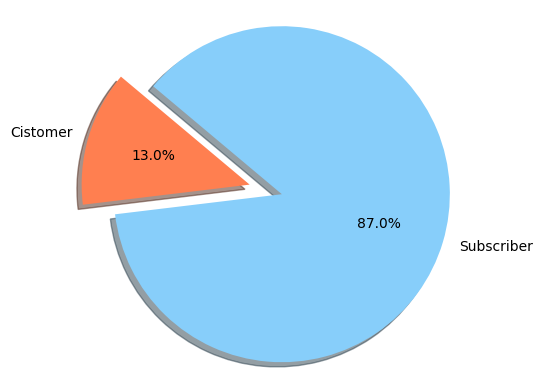

In [35]:
# 3) Bike Rides % by user type
customer = ford_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = ford_clean.query('user_type == "Subscriber"')['bike_id'].count()

customerP= (customer/ford_clean['bike_id'].count())*100
subscriberP= (subscriber/ford_clean['bike_id'].count())*100

customer, subscriber,customerP,subscriberP

# Data to plot
labels = ['Cistomer', 'Subscriber']
sizes = [customerP,subscriberP]
colors = [ 'coral', 'lightskyblue']
explode = ( 0.2, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<Axes: xlabel='start_station_id', ylabel='duration_sec'>

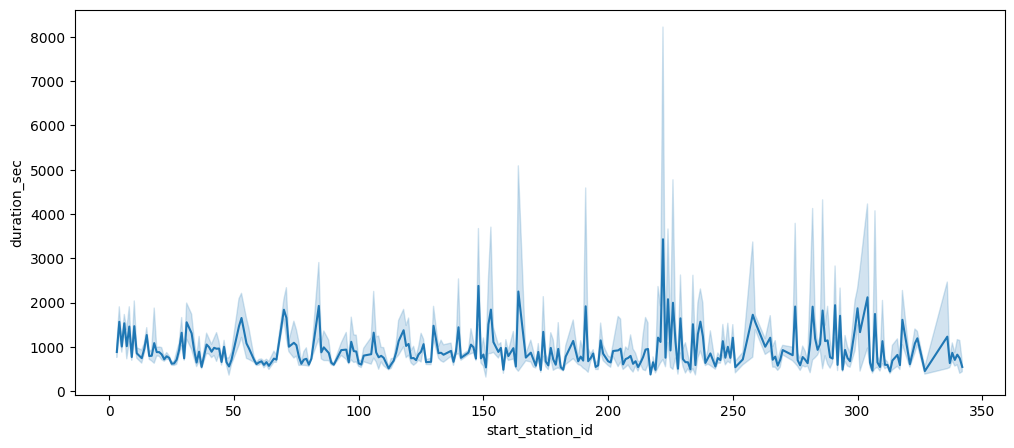

In [36]:
#Trip Duration and Start Station
plt.figure(figsize=(12,5))
sns.lineplot(y="duration_sec", x="start_station_id",data=ford_clean)


<Axes: xlabel='end_station_id', ylabel='duration_sec'>

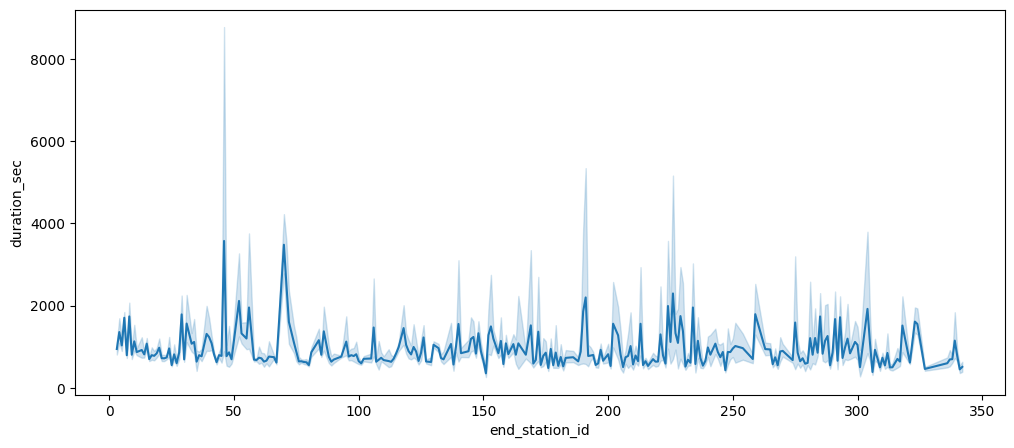

In [37]:
#Trip Duration and End Station
plt.figure(figsize=(12,5))
sns.lineplot(y="duration_sec", x="end_station_id",data=ford_clean)


#### Multivariate Exploration
    1) Create faceted scatterplot of the day and time by user type
        Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
    
    2) Duration of bikers acreoss day of week nd hour
        #Source : https://seaborn.pydata.org/generated/seaborn.pointplot.html
    
    3) Showing usage during the weekday for customers and subscribers(Heatmap)
        # source: https://seaborn.pydata.org/generated/seaborn.heatmap.html

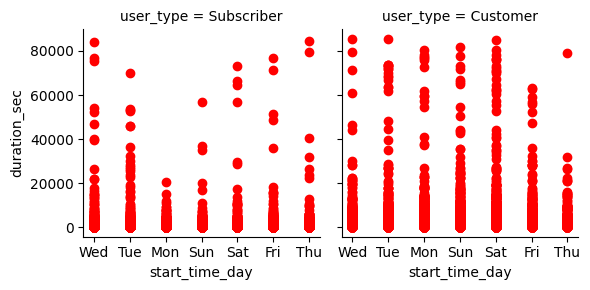

In [38]:
# Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# create faceted scatterplot of the day and time by user type
g = sns.FacetGrid(ford_clean, col="user_type", height=3)
g = g.map(plt.scatter,'start_time_day', "duration_sec",color='r')

<Figure size 1500x700 with 0 Axes>

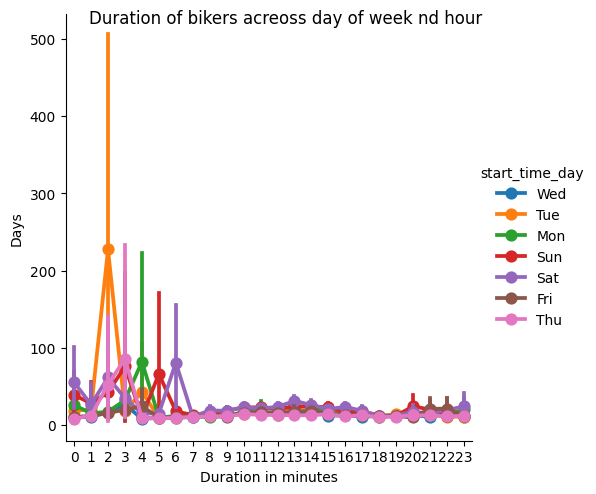

In [40]:
#Source : https://seaborn.pydata.org/generated/seaborn.pointplot.html
#Duration of bikers acreoss day of week nd hour
plt.figure(figsize=(15,7))
# Ensure 'duration_min' is in ford_clean
ford_clean['duration_min'] = ford_clean['duration_sec'] / 60  # Recalculate if needed

a = sns.catplot(x="start_time_hour", y="duration_min", hue='start_time_day', kind="point", data=ford_clean)

a.fig.suptitle('Duration of bikers acreoss day of week nd hour')

a.set_axis_labels('Duration in minutes', "Days")

<Axes: xlabel='start_time_day', ylabel='start_time_hour'>

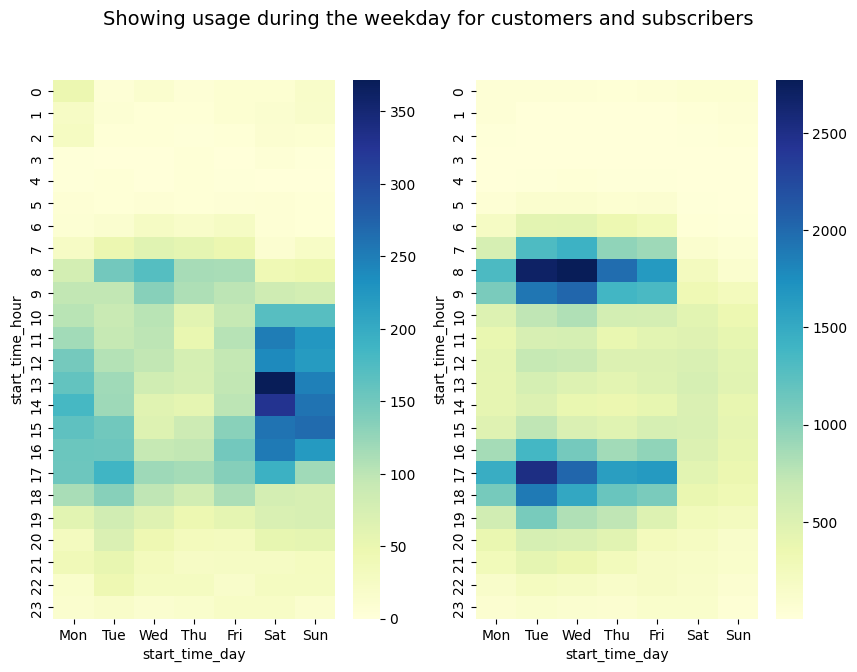

In [42]:
#(Heatmap) Showing usage during the weekday for customers and subscribers
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(10,7))
plt.suptitle('Showing usage during the weekday for customers and subscribers', fontsize=14)

# Setting the weekday order
ford_clean['start_time_day'] = pd.Categorical(ford_clean['start_time_day'],
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'])


# heatmap for customers
plt.subplot(1, 2, 1)
customer_df = ford_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
# Changed: Using pivot with index, columns, and values arguments
customer_df = customer_df.pivot(index="start_time_hour", columns="start_time_day", values="bike_id")
sns.heatmap(customer_df, cmap="YlGnBu")


# heatmap for subscribers
plt.subplot(1, 2, 2)
subscriber_df = ford_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
# Changed: Using pivot with index, columns, and values arguments
subscriber_df = subscriber_df.pivot(index="start_time_hour", columns="start_time_day", values="bike_id")
sns.heatmap(subscriber_df, cmap="YlGnBu")

**The plot perfectly summarizes the diffrent trends for customers and subscribers**


### Summary

    -TheFord GoBike System is a fantastic (healthy and environmentally friendly)
    -Customers use the bike sharing system more often on weekends
    -Subscribers use the bike sharing system mainly on weekdays